<a href="https://colab.research.google.com/github/JihyeLimm/Quest/blob/main/Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

In [1]:
import os
from google.colab import drive
drive.mount('/gdrive', force_remount = True)
os.chdir("/gdrive/MyDrive/AIFFEL/230516")
os.getcwd()

Mounted at /gdrive


'/gdrive/MyDrive/AIFFEL/230516'

맥북 중고가 맞춰보는 실습
>dataset: 맥북 사용연수, 중고가격

In [2]:
import pandas as pd
from IPython.display import display, Image

#data확인
macbook = pd.read_csv("/gdrive/MyDrive/AIFFEL/230517/macbook.csv")
print(macbook.shape)
macbook.head()

(80, 2)


,used_years,price
0,2.65,175
1,3.80,63
2,0.95,273
3,4.50,133
4,4.45,106


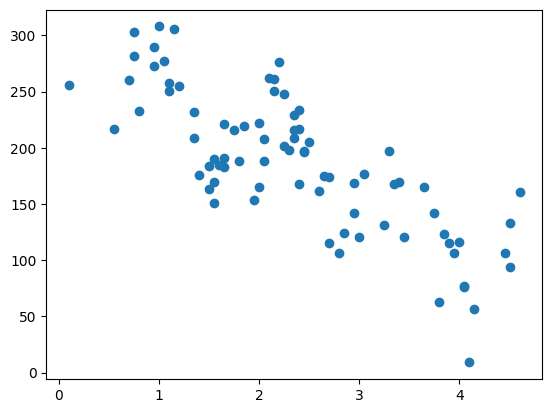

In [3]:
#데이터 시각화
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.fiture_format = "retina"   #더 높은 해상도로 출력

plt.scatter(macbook["used_years"], macbook["price"])
plt.show()

In [4]:
#상관계수 구하기
import numpy as np

#np.corrcoef(x, y)사용
np.corrcoef(macbook["used_years"], macbook["price"])

array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

In [5]:
#모델만들기

#x에는 used_years의 정보를, 출력해당하는 y에는 price정보 담기
x = macbook["used_years"].values
y = macbook["price"].values

#일차함수 모델
def model(x, w, b):
  y = w * x + b
  return y


#파라미터 초기값 셋팅
w = 3.1
b = 2.3

prediction = model(x, w, b) 
macbook['prediction'] = prediction
macbook['error'] = macbook['price'] - macbook['prediction']

def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse

rmse = RMSE(prediction, y)

#손실함수 정의
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L

#기울기 함수 정의 
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db


#정의한 손실함수와 기울기함수로 

 손님 테이블에 대한 여러 가지 정보가 담긴 데이터셋으로 그 테이블이 낼 팁(tip)을 예측
 >팁 데이터셋은 데이터 시각화 패키지인 seaborn 패키지 안에 포함

In [12]:
import seaborn as sns
sns.get_dataset_names()  #seaborn에서 제공되는 데이터셋들 

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [10]:
tips = sns.load_dataset("tips")
print(tips.shape)   #(244, 7)
tips.head(3)

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [11]:
#범주형변수를 get_dummies()함수이용해서 변환
import pandas as pd
tips = pd.get_dummies(tips, columns = ["sex", "smoker", "day", "time"])

#컬럼순서 목적에 맞게 바꾸기 (tip을 가장 오른쪽으로)
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head(3)

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50


Project1
1. 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [27]:
#데이터 다운로드
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


diabetes = load_diabetes()

df_x = diabetes.data
df_y = diabetes.target

print(type(df_x), df_x.shape)

#train /test data 분리
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


#모델준비하기 
W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

#손실함수loss정의
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


#기울기 함수 구현
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db



<class 'numpy.ndarray'> (442, 10)
(353, 10) (353,)
(89, 10) (89,)


In [31]:
#하이퍼파라미터 학습률 설정
LEARNING_RATE = 0.5

#모델 학습
losses = []

for i in range(1, 10):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 2 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))


#테스트 데이터 성능 확인
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse   #3000이하

Iteration 2 : Loss 2888.3089
Iteration 4 : Loss 2888.3073
Iteration 6 : Loss 2888.3056
Iteration 8 : Loss 2888.3040


2885.954481380784

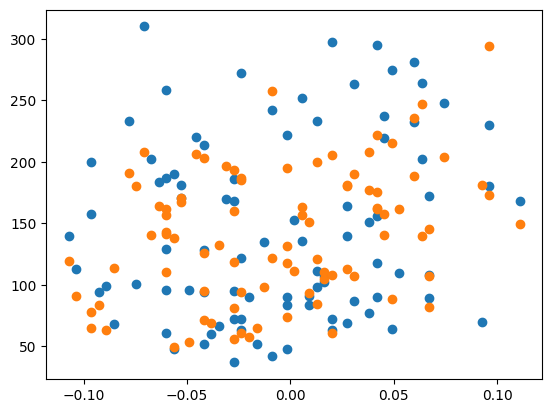

In [21]:
#정답데이터와 예측한 데이터 시각화
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

2. 시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 통해 자전거의 대여량 예측
>https://www.kaggle.com/competitions/bike-sharing-demand/code

In [52]:
import os
from google.colab import drive
drive.mount('/gdrive', force_remount = True)
os.chdir("/gdrive/MyDrive/AIFFEL/230517")
os.getcwd()

train = pd.read_csv('/gdrive/MyDrive/AIFFEL/230517/train.csv')
print(train.shape)  #(10886, 12)
train.head()

Mounted at /gdrive
(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [53]:
#date컬럼 자료형 변환
train["datetime"] = pd.to_datetime(train["datetime"])

#연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성
train['year']=train[ "datetime"].dt.year
train['month']=train[ "datetime"].dt.month
train['day']=train[ "datetime"].dt.day
train['hr']=train[ "datetime"].dt.hour
train['min']=train[ "datetime"].dt.minute
train['sec']=train[ "datetime"].dt.second
train.tail(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hr,min,sec
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,0,0


<Axes: xlabel='sec', ylabel='count'>

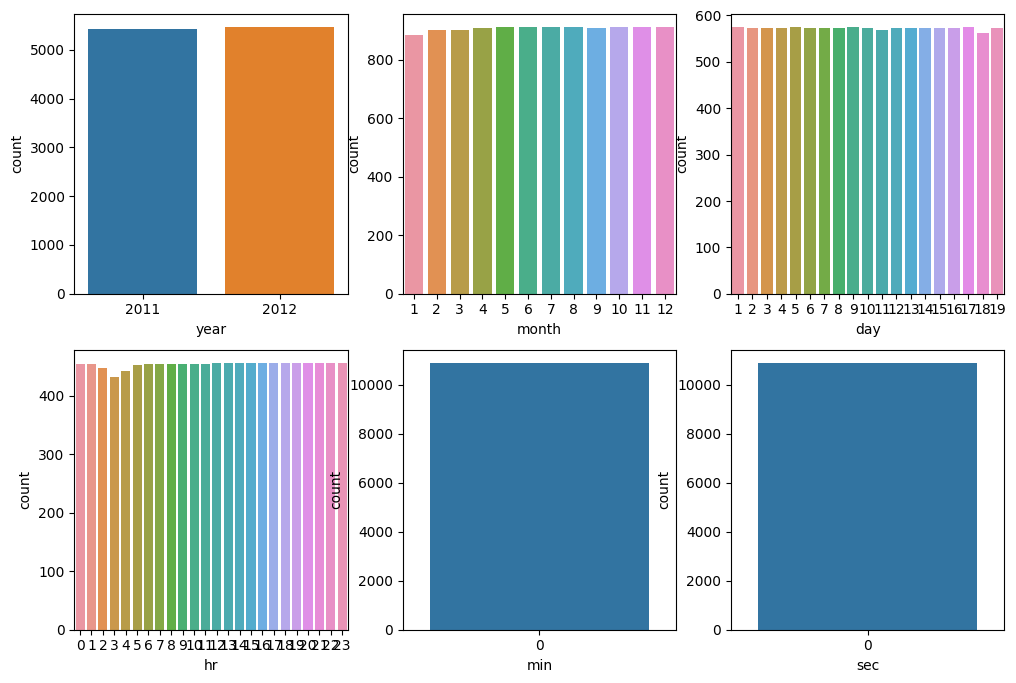

In [13]:
#year, month, day, hour, minute, second 데이터 개수 시각화
plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
#plt.title('year')
sns.countplot(x = "year", data = train)

plt.subplot(2,3,2)
#plt.title('month')
sns.countplot(x = "month", data = train)

plt.subplot(2,3,3)
#plt.title('day')
sns.countplot(x = "day", data = train)

plt.subplot(2,3,4)
#plt.title('hour')
sns.countplot(x = "hr", data = train)

plt.subplot(2,3,5)
#plt.title('minute')
sns.countplot(x = "min", data = train)

plt.subplot(2,3,6)
#plt.title('second')
sns.countplot(x = "sec", data = train)

In [62]:
#컬럼선택

train = train[["season", "holiday", "workingday", "weather", "temp", "atemp",	"humidity", "windspeed", "count", "hr"]]
train.head(3)
X = train[["season", "holiday", "workingday", "weather", "temp", "atemp",	"humidity", "windspeed", "hr"]].values
y = train[["count"]].values


print(type(X), X.shape)  #(10886, 8)

#train /test data 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape) #(8708, 8) (8708, 1)
print(X_test.shape, y_test.shape)   #(2178, 8) (2178, 1)


<class 'numpy.ndarray'> (10886, 9)
(8708, 9) (8708, 1)
(2178, 9) (2178, 1)


In [63]:
#LinearRegresson 모델학습
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [64]:
#학습된 모델로 x_test에 대한 예측값 출력
predictions = model.predict(X_test)
len(predictions)
#predictions

2178

In [65]:
#손실함수 값 계산
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(mse)
print(mse)
print(RMSE)  #150이하 나와야함 

21723.95125263217
147.3904720551236


In [79]:
X_test #(2178 × 8)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
3133,3,0,1,1,33.62,40.150,59,0.0000
5786,1,1,0,1,4.10,6.820,54,6.0032
5224,4,0,0,1,9.84,11.365,48,12.9980
8953,3,0,1,2,29.52,34.090,62,12.9980
8054,2,0,1,1,25.42,31.060,53,16.9979
...,...,...,...,...,...,...,...,...
1963,2,0,0,3,23.78,27.275,49,19.0012
5807,1,0,1,3,13.12,15.150,66,22.0028
10061,4,0,0,1,16.40,20.455,40,12.9980
5427,1,0,0,1,11.48,14.395,81,7.0015


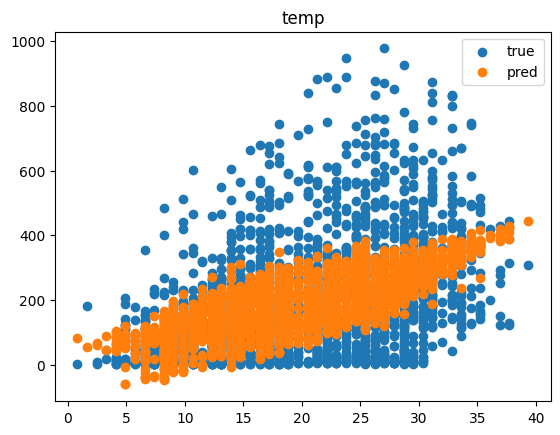

In [25]:
#x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
plt.scatter(X_test[:, 4], y_test, label="true")
plt.scatter(X_test[:, 4], predictions, label="pred")
plt.title("temp")
plt.legend()
plt.show()

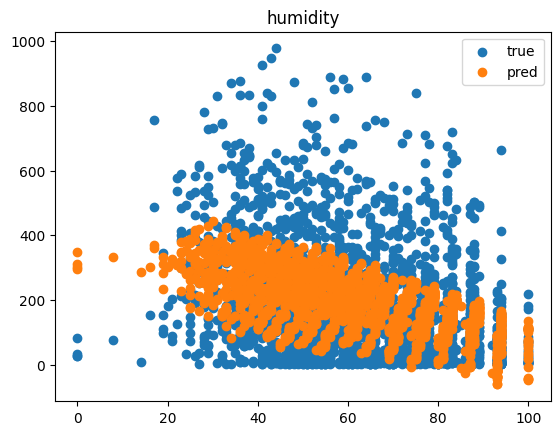

In [26]:
plt.scatter(X_test[:, 6], y_test, label="true")
plt.scatter(X_test[:, 6], predictions, label="pred")
plt.title("humidity")
plt.legend()
plt.show()